# Import Library

In [1]:
import pandas as pd
import numpy as np
import statsmodels.stats.proportion as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Load Dataset

In [2]:
iris = pd.read_csv('iris.csv')
iris.drop(['Id'], axis = 1, inplace = True)

In [3]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Provide Types of Variables

In [5]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# Provide for Numerical Column

Mean

In [6]:
iris.mean().to_frame().transpose()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.843333,3.054,3.758667,1.198667


Median

In [7]:
iris.median().to_frame().transpose()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.8,3.0,4.35,1.3


Mode

In [8]:
iris.mode(axis = 0)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.0,3.0,1.5,0.2,Iris-setosa
1,NaN,NaN,NaN,NaN,Iris-versicolor
2,NaN,NaN,NaN,NaN,Iris-virginica


Semua jenis spesies muncul sebagai modus karena memiliki jumlah yang sama

Quartile 1 & 3

In [9]:
iris.quantile([0.25, 0.75])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0.25,5.1,2.8,1.6,0.3
0.75,6.4,3.3,5.1,1.8


Percentile 90 & 99

In [10]:
iris.quantile([0.9, 0.99])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0.90,6.9,3.610,5.8,2.2
0.99,7.7,4.151,6.7,2.5


Histogram

Text(0, 0.5, 'Count')

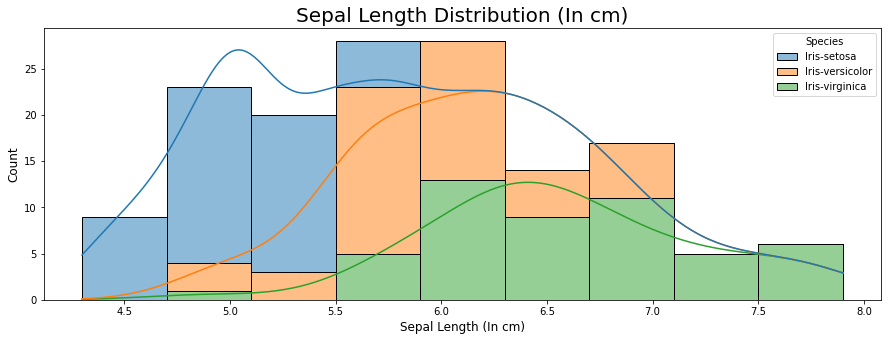

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))
vizsepallength = sns.histplot(data = iris, x=iris.SepalLengthCm, hue = 'Species', multiple = 'stack', kde = True)
vizsepallength.set_title('Sepal Length Distribution (In cm)', fontsize = 20)
vizsepallength.set_xlabel('Sepal Length (In cm)', fontsize = 12)
vizsepallength.set_ylabel('Count', fontsize = 12)

Text(0, 0.5, 'Count')

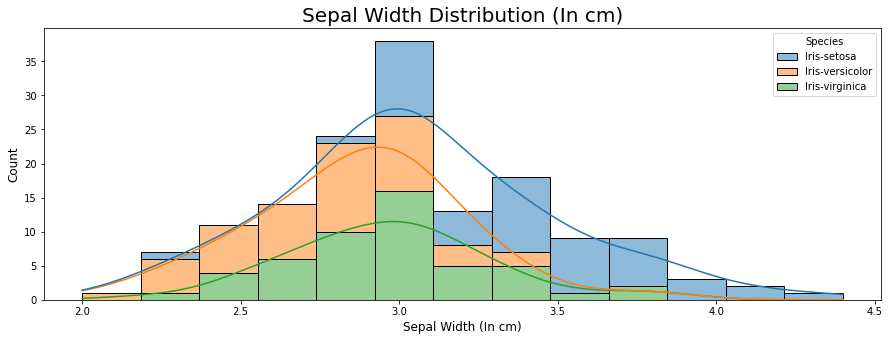

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))
vizsepallength = sns.histplot(data = iris, x=iris.SepalWidthCm, hue = 'Species', multiple = 'stack', kde = True)
vizsepallength.set_title('Sepal Width Distribution (In cm)', fontsize = 20)
vizsepallength.set_xlabel('Sepal Width (In cm)', fontsize = 12)
vizsepallength.set_ylabel('Count', fontsize = 12)

Text(0, 0.5, 'Count')

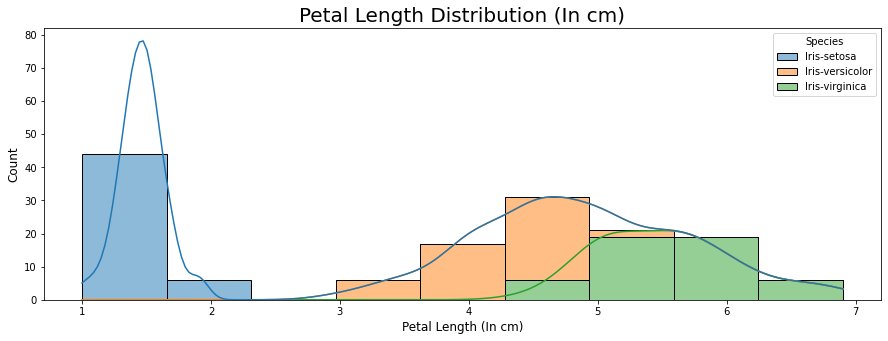

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))
vizsepallength = sns.histplot(data = iris, x=iris.PetalLengthCm, hue = 'Species', multiple = 'stack', kde = True)
vizsepallength.set_title('Petal Length Distribution (In cm)', fontsize = 20)
vizsepallength.set_xlabel('Petal Length (In cm)', fontsize = 12)
vizsepallength.set_ylabel('Count', fontsize = 12)

Text(0, 0.5, 'Count')

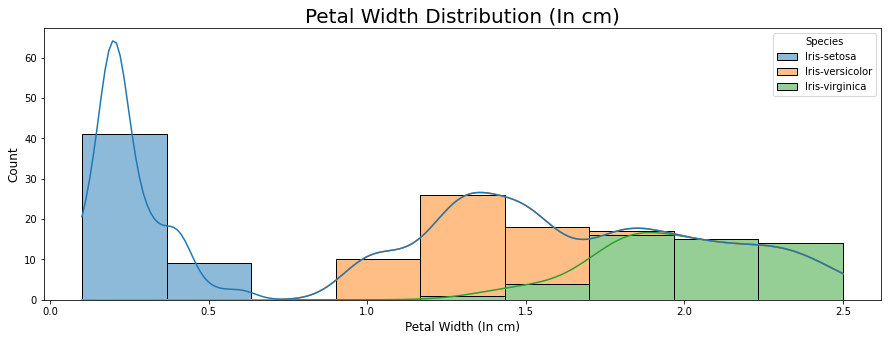

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))
vizsepallength = sns.histplot(data = iris, x=iris.PetalWidthCm, hue = 'Species', multiple = 'stack', kde = True)
vizsepallength.set_title('Petal Width Distribution (In cm)', fontsize = 20)
vizsepallength.set_xlabel('Petal Width (In cm)', fontsize = 12)
vizsepallength.set_ylabel('Count', fontsize = 12)

Calculate coefficient correlation between numerical column

In [15]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


# Perform Hypothesis Test

Do setosa species have a larger sepal width than versicolor?

In [16]:
new_iris = pd.melt(iris, id_vars = ['Species'], value_vars = ['SepalWidthCm'])

In [17]:
new_iris

,Species,variable,value
0,Iris-setosa,SepalWidthCm,3.5
1,Iris-setosa,SepalWidthCm,3.0
2,Iris-setosa,SepalWidthCm,3.2
3,Iris-setosa,SepalWidthCm,3.1
4,Iris-setosa,SepalWidthCm,3.6
...,...,...,...
145,Iris-virginica,SepalWidthCm,3.0
146,Iris-virginica,SepalWidthCm,2.5
147,Iris-virginica,SepalWidthCm,3.0
148,Iris-virginica,SepalWidthCm,3.4


In [18]:
iris_setosa = new_iris[new_iris['Species'] == 'Iris-setosa']
iris_setosa

,Species,variable,value
0,Iris-setosa,SepalWidthCm,3.5
1,Iris-setosa,SepalWidthCm,3.0
2,Iris-setosa,SepalWidthCm,3.2
3,Iris-setosa,SepalWidthCm,3.1
4,Iris-setosa,SepalWidthCm,3.6
5,Iris-setosa,SepalWidthCm,3.9
6,Iris-setosa,SepalWidthCm,3.4
7,Iris-setosa,SepalWidthCm,3.4
8,Iris-setosa,SepalWidthCm,2.9
9,Iris-setosa,SepalWidthCm,3.1


In [19]:
iris_versicolor = new_iris[new_iris['Species'] == 'Iris-versicolor']
iris_versicolor.reset_index(inplace = True, drop = True)
iris_versicolor

,Species,variable,value
0,Iris-versicolor,SepalWidthCm,3.2
1,Iris-versicolor,SepalWidthCm,3.2
2,Iris-versicolor,SepalWidthCm,3.1
3,Iris-versicolor,SepalWidthCm,2.3
4,Iris-versicolor,SepalWidthCm,2.8
5,Iris-versicolor,SepalWidthCm,2.8
6,Iris-versicolor,SepalWidthCm,3.3
7,Iris-versicolor,SepalWidthCm,2.4
8,Iris-versicolor,SepalWidthCm,2.9
9,Iris-versicolor,SepalWidthCm,2.7


In [20]:
pvalue = stats.ttest_ind(iris_setosa['value'], iris_versicolor['value']).pvalue

print('P-Value : '+ str(pvalue))
if pvalue < 0.05:
    print('Sufficient to reject H0')
else :
    print('Insufficient to reject H0')

P-Value : 4.362239016010214e-15
Sufficient to reject H0


Kesimpulan

Karena pvalue lebih kecil dari 0.05, maka H1 diterima yaitu lebar sepal iris setosa lebih lebar dari lebar sepal iris versicolor

In [21]:
stats.mannwhitneyu(iris_setosa['value'], iris_versicolor['value'])

MannwhitneyuResult(statistic=194.5, pvalue=1.4917211376731874e-13)